<h5>a)</h5>
Se cargan los datos, se dividen en los conjuntos de test y entrenamiento y luego se normalizan.

In [1]:
import pandas as pd
import numpy as np
from keras import backend as K

K.set_image_dim_ordering('th')

url = 'http://www.inf.utfsm.cl/~cvalle/international-airline-passengers.csv'
dataframe = pd.read_csv(url, sep=',', usecols=[1], engine='python', skipfooter=3)
dataframe[:] = dataframe[:].astype('float32')
df_train, df_test = dataframe[0:96].values, dataframe[96:].values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)).fit(df_train)
stream_train_scaled = scaler.transform(df_train)
stream_test_scaled = scaler.transform(df_test)


Using TensorFlow backend.


<h5>b)</h5>

Se crea una función para generar el dataset a partir de la secuencia en función del lag.

In [ ]:
def create_dataset(dataset, lag=3):
    dataX = []
    dataY = []
    for i in range(0, len(dataset)-lag):
        dataX.append(dataset[i: i + lag, 0])
        dataY.append(dataset[i + lag, 0])
    return np.array(dataX), np.array(dataY)


<h5>c)-d)</h5>
Se generan los conjuntos de entrenamiento y test con un lag 3. Luego se cambia la forma como se solicita en d.

In [3]:
lag = 3
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



<h5>e)</h5>
Se entrena la LSTM con un lag 3

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


model = Sequential()
model.add(LSTM(4, input_dim=lag, activation='tanh', inner_activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=1)

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 3), recurrent_activation="sigmoid", activation="tanh")`
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
93/93 [==============================] - 4s - loss: 0.1301     
Epoch 2/100
93/93 [==============================] - 0s - loss: 0.0685     
Epoch 3/100
93/93 [==============================] - 0s - loss: 0.0366     
Epoch 4/100
93/93 [==============================] - 0s - loss: 0.0259     
Epoch 5/100
93/93 [==============================] - 0s - loss: 0.0222     
Epoch 6/100
93/93 [==============================] - 0s - loss: 0.0198     
Epoch 7/100
93/93 [==============================] - 0s - loss: 0.0178     
Epoch 8/100
93/93 [==============================] - 0s - loss: 0.0159     
Epoch 9/100
93/93 [==============================] - 0s - loss: 0.0142     
Epoch 10/100
93/93 [==============================] - 0s - loss: 0.0128     
Epoch 11/100
93/93 [==============================] - 0s - loss: 0.0117     
Epoch 12/100
93/93 [==============================] - 0s - loss: 0.0109     
Epoch 13/100
93/93 [==============================] - 0s - loss: 0.0104     
Epoch 14

<h5>f)</h5>
Se realizan las predicciones del modelo para los conjuntos de entrenamiento y prueba y se desnormalizan.

In [5]:
trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)



testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


<h5>g)</h5>
Se calcula el RMSE para datos de test y de entrenamiento.

In [6]:
from sklearn.metrics import mean_squared_error
import math

# calculate root mean squared error


trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.70 RMSE
Test Score: 65.42 RMSE


<h5>h)</h5>
Se grafican las predicciones de los datos de test, entrenamiento y los datos reales. Para esto, considerando que el dataset fue dividido en dos partes, es necesario llenar los valores faltantes para los datos de test y entrenamiento con nan para poder gráficarlos de manera correcta.

(144, 1)
(144, 1)
(144, 1)


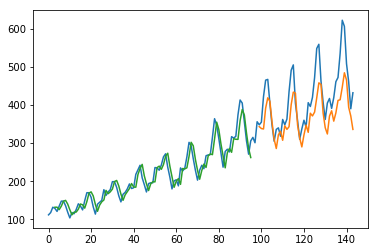

In [9]:
import matplotlib.pyplot as plt
print(y.shape)
print(testPredictPlot.shape)
print(trainPredictPlot.shape)
plt.plot(y)
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)
plt.show()

<h5>h.2)</h5>
Todos los valores de error cuadrático medio son similares, por lo cual no se puede predecir cual de los resultados es mejor.

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
nb=range(4,13,2)
for i in nb:
    model = Sequential()
    model.add(LSTM(i, input_dim=lag, activation='tanh', inner_activation='sigmoid'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=1)
    trainScore = model.evaluate(trainX, trainY, verbose=1)
    print('Train Accuracy: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
    testScore = model.evaluate(testX, testY, verbose=1)
    print('Test Accuracy: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:8: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 3), recurrent_activation="sigmoid", activation="tanh")`
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
93/93 [==============================] - 4s - loss: 0.1924     
Epoch 2/100
93/93 [==============================] - 0s - loss: 0.1048     
Epoch 3/100
93/93 [==============================] - 0s - loss: 0.0553     
Epoch 4/100
93/93 [==============================] - 0s - loss: 0.0357     
Epoch 5/100
93/93 [==============================] - 0s - loss: 0.0298     
Epoch 6/100
93/93 [==============================] - 0s - loss: 0.0272     
Epoch 7/100
93/93 [==============================] - 0s - loss: 0.0244     
Epoch 8/100
93/93 [==============================] - 0s - loss: 0.0221     
Epoch 9/100
93/93 [==============================] - 0s - loss: 0.0202     
Epoch 10/100
93/93 [==============================] - 0s - loss: 0.0183     
Epoch 11/100
93/93 [==============================] - 0s - loss: 0.0168     
Epoch 12/100
93/93 [==============================] - 0s - loss: 0.0154     
Epoch 13/100
93/93 [==============================] - 0s - loss: 0.0140     
Epoch 14

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(6, input_shape=(None, 3), recurrent_activation="sigmoid", activation="tanh")`


Epoch 1/100
93/93 [==============================] - 1s - loss: 0.1196     
Epoch 2/100
93/93 [==============================] - 0s - loss: 0.0429     
Epoch 3/100
93/93 [==============================] - 0s - loss: 0.0212     
Epoch 4/100
93/93 [==============================] - 0s - loss: 0.0174     
Epoch 5/100
93/93 [==============================] - 0s - loss: 0.0145     
Epoch 6/100
93/93 [==============================] - 0s - loss: 0.0124     
Epoch 7/100
93/93 [==============================] - 0s - loss: 0.0109     
Epoch 8/100
93/93 [==============================] - 0s - loss: 0.0099     
Epoch 9/100
93/93 [==============================] - 0s - loss: 0.0092     
Epoch 10/100
93/93 [==============================] - 0s - loss: 0.0088     
Epoch 11/100
93/93 [==============================] - 0s - loss: 0.0084     
Epoch 12/100
93/93 [==============================] - 0s - loss: 0.0086     
Epoch 13/100
93/93 [==============================] - 0s - loss: 0.0082     
Epoch 14

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(8, input_shape=(None, 3), recurrent_activation="sigmoid", activation="tanh")`


Epoch 1/100
93/93 [==============================] - 1s - loss: 0.1191     
Epoch 2/100
93/93 [==============================] - 0s - loss: 0.0440     
Epoch 3/100
93/93 [==============================] - 0s - loss: 0.0229     
Epoch 4/100
93/93 [==============================] - 0s - loss: 0.0190     
Epoch 5/100
93/93 [==============================] - 0s - loss: 0.0170     
Epoch 6/100
93/93 [==============================] - 0s - loss: 0.0155     
Epoch 7/100
93/93 [==============================] - 0s - loss: 0.0140     
Epoch 8/100
93/93 [==============================] - 0s - loss: 0.0133     
Epoch 9/100
93/93 [==============================] - 0s - loss: 0.0122     
Epoch 10/100
93/93 [==============================] - 0s - loss: 0.0119     
Epoch 11/100
93/93 [==============================] - 0s - loss: 0.0115     
Epoch 12/100
93/93 [==============================] - 0s - loss: 0.0114     
Epoch 13/100
93/93 [==============================] - 0s - loss: 0.0108     
Epoch 14

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(10, input_shape=(None, 3), recurrent_activation="sigmoid", activation="tanh")`


Epoch 1/100
93/93 [==============================] - 1s - loss: 0.1229     
Epoch 2/100
93/93 [==============================] - 0s - loss: 0.0430     
Epoch 3/100
93/93 [==============================] - 0s - loss: 0.0224     
Epoch 4/100
93/93 [==============================] - 0s - loss: 0.0188     
Epoch 5/100
93/93 [==============================] - 0s - loss: 0.0164     
Epoch 6/100
93/93 [==============================] - 0s - loss: 0.0146     
Epoch 7/100
93/93 [==============================] - 0s - loss: 0.0133     
Epoch 8/100
93/93 [==============================] - 0s - loss: 0.0127     
Epoch 9/100
93/93 [==============================] - 0s - loss: 0.0121     
Epoch 10/100
93/93 [==============================] - 0s - loss: 0.0113     
Epoch 11/100
93/93 [==============================] - 0s - loss: 0.0108     
Epoch 12/100
93/93 [==============================] - 0s - loss: 0.0107     
Epoch 13/100
93/93 [==============================] - 0s - loss: 0.0101     
Epoch 14

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(12, input_shape=(None, 3), recurrent_activation="sigmoid", activation="tanh")`


Epoch 1/100
93/93 [==============================] - 1s - loss: 0.1203     
Epoch 2/100
93/93 [==============================] - 0s - loss: 0.0378     
Epoch 3/100
93/93 [==============================] - 0s - loss: 0.0205     
Epoch 4/100
93/93 [==============================] - 0s - loss: 0.0171     
Epoch 5/100
93/93 [==============================] - 0s - loss: 0.0151     
Epoch 6/100
93/93 [==============================] - 0s - loss: 0.0136     
Epoch 7/100
93/93 [==============================] - 0s - loss: 0.0127     
Epoch 8/100
93/93 [==============================] - 0s - loss: 0.0116     
Epoch 9/100
93/93 [==============================] - 0s - loss: 0.0109     
Epoch 10/100
93/93 [==============================] - 0s - loss: 0.0105     
Epoch 11/100
93/93 [==============================] - 0s - loss: 0.0102     
Epoch 12/100
93/93 [==============================] - 0s - loss: 0.0097     
Epoch 13/100
93/93 [==============================] - 0s - loss: 0.0096     
Epoch 14

<h5>i)</h5>
Se comparan las redes con lag 1 y lag 4. Se obtiene une RMSE levemente menor para el caso del lag = 1.

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:15: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:15: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, activation="tanh", input_shape=(None, 1), recurrent_activation="sigmoid")`
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
95/95 [==============================] - 4s - loss: 0.1512     
Epoch 2/100
95/95 [==============================] - 0s - loss: 0.0853     
Epoch 3/100
95/95 [==============================] - 0s - loss: 0.0529     
Epoch 4/100
95/95 [==============================] - 0s - loss: 0.0398     
Epoch 5/100
95/95 [==============================] - 0s - loss: 0.0343     
Epoch 6/100
95/95 [==============================] - 0s - loss: 0.0314     
Epoch 7/100
95/95 [==============================] - 0s - loss: 0.0290     
Epoch 8/100
95/95 [==============================] - 0s - loss: 0.0266     
Epoch 9/100
95/95 [==============================] - 0s - loss: 0.0244     
Epoch 10/100
95/95 [==============================] - 0s - loss: 0.0220     
Epoch 11/100
95/95 [==============================] - 0s - loss: 0.0199     
Epoch 12/100
95/95 [==============================] - 0s - loss: 0.0178     
Epoch 13/100
95/95 [==============================] - 0s - loss: 0.0158     
Epoch 14

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


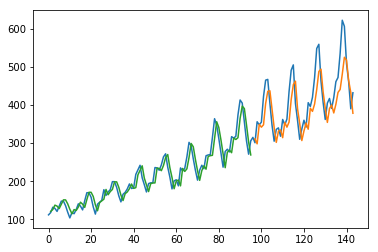

In [4]:
lag = 1
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


model = Sequential()
model.add(LSTM(4, input_dim=lag, activation='tanh', inner_activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=1)

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)



testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)


from sklearn.metrics import mean_squared_error
import math

# calculate root mean squared error


trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan

trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan

testPredictPlot[(len(trainPredict)+2*lag):, :] = testPredict

y = dataframe.values


import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)
plt.show()

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:15: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:15: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, recurrent_activation="sigmoid", input_shape=(None, 4), activation="tanh")`
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
92/92 [==============================] - 4s - loss: 0.0941     
Epoch 2/100
92/92 [==============================] - 0s - loss: 0.0334     
Epoch 3/100
92/92 [==============================] - 0s - loss: 0.0209     
Epoch 4/100
92/92 [==============================] - 0s - loss: 0.0176     
Epoch 5/100
92/92 [==============================] - 0s - loss: 0.0156     
Epoch 6/100
92/92 [==============================] - 0s - loss: 0.0141     
Epoch 7/100
92/92 [==============================] - 0s - loss: 0.0129     
Epoch 8/100
92/92 [==============================] - 0s - loss: 0.0122     
Epoch 9/100
92/92 [==============================] - 0s - loss: 0.0115     
Epoch 10/100
92/92 [==============================] - 0s - loss: 0.0109     
Epoch 11/100
92/92 [==============================] - 0s - loss: 0.0107     
Epoch 12/100
92/92 [==============================] - 0s - loss: 0.0103     
Epoch 13/100
92/92 [==============================] - 0s - loss: 0.0099     
Epoch 14

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


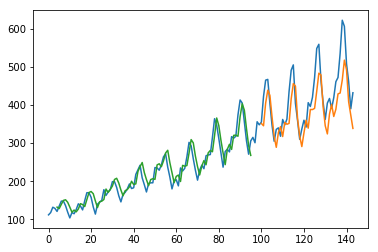

In [4]:
lag = 4
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


model = Sequential()
model.add(LSTM(4, input_dim=lag, activation='tanh', inner_activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=1)

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)



testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)


from sklearn.metrics import mean_squared_error
import math

# calculate root mean squared error


trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan

trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan

testPredictPlot[(len(trainPredict)+2*lag):, :] = testPredict

y = dataframe.values


import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)
plt.show()

<h5>j)</h5>
Se comparan los resultados de la LSTM con una GRU y una red recurrente simple. Se obtiene un error levemente menor en GRU, seguido de la red recurrente simple y por último el error más alto fue de la LSTM. Cabe mencionar que la diferencias de error son mínimas, por lo cual no se puede decir a ciencia cierta que para este problema, GRU es lo mejor, pero al menos con las pruebas realizadas, fue el de mejor comportamiento. 


<h6>GRU</h6>

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:20: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:20: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(4, input_shape=(None, 4), activation="tanh", recurrent_initializer="orthogonal")`
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
92/92 [==============================] - 1s - loss: 0.2278     
Epoch 2/100
92/92 [==============================] - 0s - loss: 0.0648     
Epoch 3/100
92/92 [==============================] - 0s - loss: 0.0331     
Epoch 4/100
92/92 [==============================] - 0s - loss: 0.0257     
Epoch 5/100
92/92 [==============================] - 0s - loss: 0.0209     
Epoch 6/100
92/92 [==============================] - 0s - loss: 0.0172     
Epoch 7/100
92/92 [==============================] - 0s - loss: 0.0144     
Epoch 8/100
92/92 [==============================] - 0s - loss: 0.0119     
Epoch 9/100
92/92 [==============================] - 0s - loss: 0.0108     
Epoch 10/100
92/92 [==============================] - 0s - loss: 0.0097     
Epoch 11/100
92/92 [==============================] - 0s - loss: 0.0089     
Epoch 12/100
92/92 [==============================] - 0s - loss: 0.0085     
Epoch 13/100
92/92 [==============================] - 0s - loss: 0.0083     
Epoch 14

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


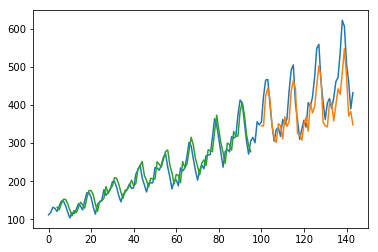

In [5]:
from keras.layers import GRU
from keras.layers import SimpleRNN


lag = 4
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


#SimpleRNN(output_dim, inner_init='orthogonal',activation='tanh')
model = Sequential()
model.add(GRU(4, input_dim=lag, inner_init='orthogonal', activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=1)

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)



testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)


from sklearn.metrics import mean_squared_error
import math

# calculate root mean squared error


trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan

trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan

testPredictPlot[(len(trainPredict)+2*lag):, :] = testPredict

y = dataframe.values


import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)
plt.show()


<h6>Red recurrente simple</h6>

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:19: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:19: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(4, input_shape=(None, 4), activation="tanh", recurrent_initializer="orthogonal")`
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
92/92 [==============================] - 0s - loss: 0.0061     
Epoch 2/100
92/92 [==============================] - 0s - loss: 0.0059     
Epoch 3/100
92/92 [==============================] - 0s - loss: 0.0055     
Epoch 4/100
92/92 [==============================] - 0s - loss: 0.0055     
Epoch 5/100
92/92 [==============================] - 0s - loss: 0.0058     
Epoch 6/100
92/92 [==============================] - 0s - loss: 0.0057     
Epoch 7/100
92/92 [==============================] - 0s - loss: 0.0055     
Epoch 8/100
92/92 [==============================] - 0s - loss: 0.0059     
Epoch 9/100
92/92 [==============================] - 0s - loss: 0.0056     
Epoch 10/100
92/92 [==============================] - 0s - loss: 0.0055     
Epoch 11/100
92/92 [==============================] - 0s - loss: 0.0054     
Epoch 12/100
92/92 [==============================] - 0s - loss: 0.0055     
Epoch 13/100
92/92 [==============================] - 0s - loss: 0.0054     
Epoch 14

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


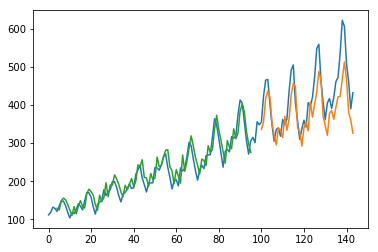

In [6]:
from keras.layers import GRU
from keras.layers import SimpleRNN


lag = 4
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


model = Sequential()
model.add(SimpleRNN(4, input_dim=lag, inner_init='orthogonal', activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=1)

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)



testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)


from sklearn.metrics import mean_squared_error
import math

# calculate root mean squared error


trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan

trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan

testPredictPlot[(len(trainPredict)+2*lag):, :] = testPredict

y = dataframe.values


import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)
plt.show()


<h5>k)</h5>
Se utiliza el time_step de 3 y dimensión de entrada 1. Los resultados son un poco mejor para la validación y un poco peores para el entrenamiento. Pero si se considera el tiempo, esta red se entrenó en mucho menos tiempo que para la utilizada en e).

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:17: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:17: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, activation="tanh", recurrent_activation="sigmoid", input_shape=(None, 1))`
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
4s - loss: 0.1407
Epoch 2/100
0s - loss: 0.0597
Epoch 3/100
0s - loss: 0.0422
Epoch 4/100
0s - loss: 0.0360
Epoch 5/100
0s - loss: 0.0302
Epoch 6/100
0s - loss: 0.0256
Epoch 7/100
0s - loss: 0.0209
Epoch 8/100
0s - loss: 0.0181
Epoch 9/100
0s - loss: 0.0152
Epoch 10/100
0s - loss: 0.0135
Epoch 11/100
0s - loss: 0.0122
Epoch 12/100
0s - loss: 0.0116
Epoch 13/100
0s - loss: 0.0112
Epoch 14/100
0s - loss: 0.0109
Epoch 15/100
0s - loss: 0.0105
Epoch 16/100
0s - loss: 0.0105
Epoch 17/100
0s - loss: 0.0109
Epoch 18/100
0s - loss: 0.0103
Epoch 19/100
0s - loss: 0.0101
Epoch 20/100
0s - loss: 0.0103
Epoch 21/100
0s - loss: 0.0100
Epoch 22/100
0s - loss: 0.0100
Epoch 23/100
0s - loss: 0.0101
Epoch 24/100
0s - loss: 0.0102
Epoch 25/100
0s - loss: 0.0100
Epoch 26/100
0s - loss: 0.0099
Epoch 27/100
0s - loss: 0.0099
Epoch 28/100
0s - loss: 0.0096
Epoch 29/100
0s - loss: 0.0097
Epoch 30/100
0s - loss: 0.0095
Epoch 31/100
0s - loss: 0.0096
Epoch 32/100
0s - loss: 0.0096
Epoch 33/100
0s -

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


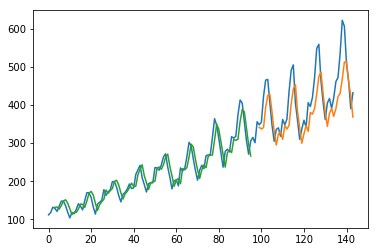

In [4]:


lag = 3
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


model = Sequential()
model.add(LSTM(4, input_dim=1, activation='tanh', inner_activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)



testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)


from sklearn.metrics import mean_squared_error
import math

# calculate root mean squared error


trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan

trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan

testPredictPlot[(len(trainPredict)+2*lag):, :] = testPredict

y = dataframe.values


import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)
plt.show()

<h5>h.2)</h5>
Se entrena una LSTM con memoria entre batches.

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train Score: 19.44 RMSE
Test Score: 80.59 RMSE


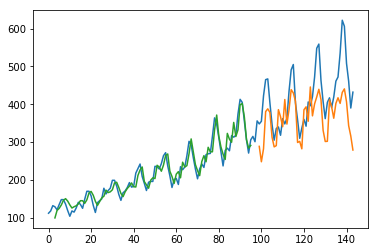

In [3]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

lag = 3
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, lag, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, lag, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=0, shuffle=False)
    model.reset_states()

trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan

trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan

testPredictPlot[(len(trainPredict)+2*lag):, :] = testPredict

y = dataframe.values


import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)
plt.show()

<h5>l)</h5>
Se utiliza un tamaño de batch 3, en el caso anterior el batch era de 1. al comparar los resultados se aprecia un mayor error cuando se utiliza un tamaño de batch 3. 

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train Score: 28.98 RMSE
Test Score: 89.97 RMSE


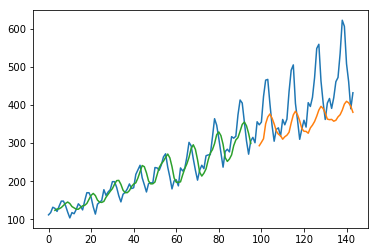

In [4]:


lag = 3
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

batch_size = 3
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, lag, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, lag, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=0, shuffle=False)
    model.reset_states()

    trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))



# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan

trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan

testPredictPlot[(len(trainPredict)+2*lag):, :] = testPredict

y = dataframe.values


import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)
plt.show()

<h5>m)</h5>
Se compara una LSTM apilada con los resultados obtenidos en k). Se aprecia un menor error en la validación, con una diferencia no despreciable. Pero el error de entrenamiento es levemente mayor en el caso de esta red apilada.


D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
5s - loss: 0.0950
Epoch 2/100
1s - loss: 0.0465
Epoch 3/100
1s - loss: 0.0443
Epoch 4/100
1s - loss: 0.0439
Epoch 5/100
1s - loss: 0.0424
Epoch 6/100
1s - loss: 0.0422
Epoch 7/100
1s - loss: 0.0377
Epoch 8/100
1s - loss: 0.0314
Epoch 9/100
1s - loss: 0.0329
Epoch 10/100
1s - loss: 0.0216
Epoch 11/100
1s - loss: 0.0229
Epoch 12/100
1s - loss: 0.0159
Epoch 13/100
1s - loss: 0.0119
Epoch 14/100
1s - loss: 0.0128
Epoch 15/100
1s - loss: 0.0117
Epoch 16/100
1s - loss: 0.0103
Epoch 17/100
1s - loss: 0.0097
Epoch 18/100
1s - loss: 0.0086
Epoch 19/100
1s - loss: 0.0092
Epoch 20/100
1s - loss: 0.0080
Epoch 21/100
1s - loss: 0.0086
Epoch 22/100
1s - loss: 0.0082
Epoch 23/100
1s - loss: 0.0081
Epoch 24/100
1s - loss: 0.0072
Epoch 25/100
1s - loss: 0.0069
Epoch 26/100
1s - loss: 0.0072
Epoch 27/100
1s - loss: 0.0076
Epoch 28/100
1s - loss: 0.0067
Epoch 29/100
1s - loss: 0.0069
Epoch 30/100
1s - loss: 0.0065
Epoch 31/100
1s - loss: 0.0059
Epoch 32/100
1s - loss: 0.0063
Epoch 33/100
1s -

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train Score: 21.60 RMSE
Test Score: 66.72 RMSE


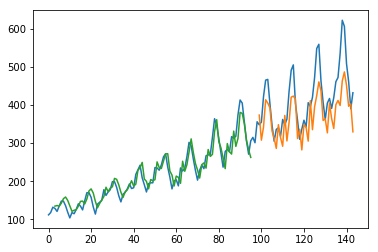

In [3]:
lag = 3
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, lag, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, lag, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

trainPredict = model.predict(trainX, batch_size=batch_size)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)



testPredict = model.predict(testX, batch_size=batch_size)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)


from sklearn.metrics import mean_squared_error
import math

# calculate root mean squared error


trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan

trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan

testPredictPlot[(len(trainPredict)+2*lag):, :] = testPredict

y = dataframe.values


import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)
plt.show()



